In [9]:
import sys
import os
sys.path.append('..')

from PIL import ImageFont

from manga_ocr.typing import Size
from manga_ocr.utils import load_images, load_texts, get_path_project_dir
from manga_ocr.utils.ploting import show_images

# Prepare the data for generator

In [10]:
generator_input_dir = get_path_project_dir('data/')

print(os.path.abspath(generator_input_dir))
print(os.listdir(generator_input_dir))

/Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data
['.DS_Store', 'manga_line_annotated', 'drawings', 'output', 'others', 'text', 'fonts']


### Prepare the data for generator > Drawings

choices_drawings 47


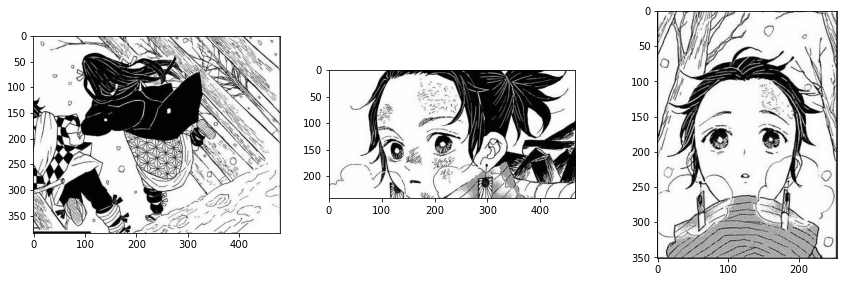

In [11]:
choices_drawings = load_images(generator_input_dir + '/drawings/*.jpg')

print('choices_drawings', len(choices_drawings))
show_images(choices_drawings[:3])

### Prepare the data for generator > Fonts

In [12]:
choices_fonts = [] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool Cat.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool Cat.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool Cat.ttf', size=21)]

print('choices_fonts', len(choices_fonts))

choices_fonts 12


### Prepare the data for generator > Texts (or Quotes)

In [13]:
choices_texts = load_texts(generator_input_dir + '/text/texts.txt')
choices_texts = [text for text in choices_texts if len(text) < 100]

print('choices_fonts', len(choices_texts))
print(choices_texts[:3])

choices_fonts 8873
['Liuyuan, did anything happen?', 'You don’t have to worry about such things. What I’m experiencing is not a sickness.', 'OK.']


# Create Generator

In [14]:
from manga_ocr.dataset.generated_manga import MangaGenerator

<PIL.Image.Image image mode=RGB size=500x400 at 0x7F8CA10AC0A0> [TextRect(xy=(264, 209), text='Well, not really, but we don’t know how to treat patients, so we just asked them to leave,', rect_padding=3, rect_fill_color=(255, 255, 255, 250), rect_outline_width=1, rect_outline_color='#000000'), TextBubble(xy=(156, 159), text='Thank you, Boss!'), TextRect(xy=(214, 68), text='OK, Big Sister Xiaoyu,', rect_padding=3, rect_fill_color=(255, 255, 255, 250), rect_outline_width=1, rect_outline_color='#000000'), TextBubble(xy=(41, 150), text='Bro.')]


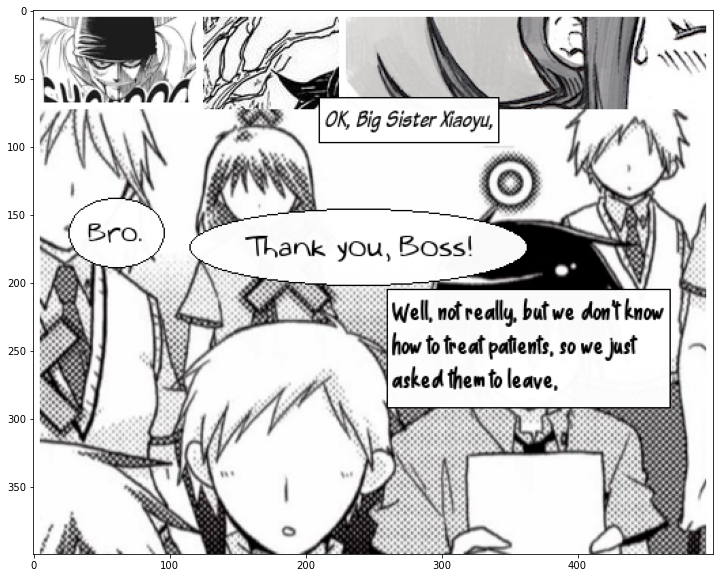

In [15]:
generator = MangaGenerator.create(
    choices_drawings=choices_drawings,
    choices_texts=choices_texts,
    choices_fonts=choices_fonts,
    choices_text_counts=[4, 5, 5, 6, 6],
    random_salt='abc')

image, texts = generator.generate(output_size=(500, 400), random_seed='1')
print(image)
print(texts)
show_images(image)

# Create dataset

In [17]:
from manga_ocr.dataset.generated_manga import create_dataset

create_dataset(
    generator=generator,
    dataset_dir=get_path_project_dir('data/output/generate_manga_dataset'),
    output_size=Size.of(750, 1500),
    output_count=500,
)